# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Dfs

0.4 Preparatory work

    0.5.1 df_user_subset where each row = 1 user
    0.5.2 df_order_subset where each row = 1 order 
    0.5.3 Random sample of 30% of the data

0.5 Defining styles, formats, and commonly used variables

0.6 Exploration

    0.6.1 Count of orders by day of week (DOW) and hour of day (HOD)


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4.1 Subset df with each row = 1 user

In [13]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [14]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [15]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False


In [16]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [17]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [18]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,1465.599976,195,13.929688,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.400024,88,7.332031,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.699997,18,3.599609,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.000000,37,9.250000,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [20]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [21]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [22]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False


In [23]:
df_order_subset.shape

(32434489, 27)

In [24]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [25]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [26]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [27]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.600000,375.700012,59,5.898438,False,False,False,True,False
5,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,False,35.400002,375.700012,59,5.898438,False,False,False,True,False
11,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,False,28.200001,375.700012,59,5.898438,False,False,False,True,False
16,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,False,26.000000,375.700012,59,5.898438,False,False,False,True,False
21,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,False,57.000000,375.700012,59,5.898438,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [28]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [29]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [30]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [31]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [32]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [33]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.600000,375.700012,59,5.898438,False,False,False,True,False,5
1,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,35.400002,375.700012,59,5.898438,False,False,False,True,False,6
2,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,28.200001,375.700012,59,5.898438,False,False,False,True,False,5
3,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,26.000000,375.700012,59,5.898438,False,False,False,True,False,5
4,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,57.000000,375.700012,59,5.898438,False,False,False,True,False,8


### 0.4.4 Random sampling of 30% of data 

In [34]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [35]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [36]:
# Compare the sample dfs to the original
len(df)

32434489

In [37]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [38]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [39]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [40]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [41]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [42]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [43]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [44]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [45]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

###     0.6.1 Count of orders by day of week (DOW) and hour of day (HOD)

In [46]:
# Creating a temp df of average order amount by day of the week
df_2 = pd.DataFrame(df_order_subset.groupby('order_day_of_week').total_spent_in_order.mean())

In [47]:
df_2

,total_spent_in_order
order_day_of_week,
0,87.39
1,78.88
2,73.92
3,72.23
4,73.13
5,76.62
6,84.34


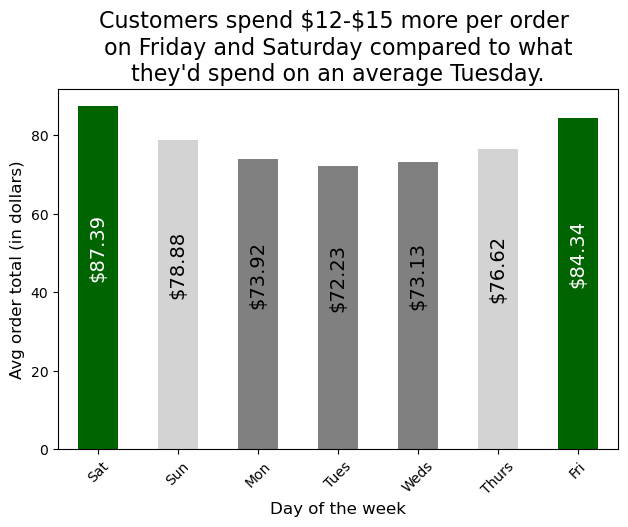

In [106]:
# define x and y to be plotted
x = dow
y = df_2['total_spent_in_order']
z = df_2['total_spent_in_order'].map('${:,.2f}'.format)
col = ['white', 'black', 'black', 'black', 'black', 'black', 'white']

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]/2, z[i], 
                 ha='center',
                 rotation = 90,
                 size=14, 
                 color=col[i])

# Make a bar chart for size_of_orders
order_dow = df_2['total_spent_in_order'].plot(kind='bar',
                                           color = ['darkgreen', 'lightgrey', 'grey', 'grey', 'grey', 'lightgrey', 'darkgreen'],
                                           figsize=(8,6))

# call the function to add value labels
addlabels(x,y)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity

plt.ylabel('Avg order total (in dollars)', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel("Day of the week", size=12 )

plt.title ("Customers spend \$12-\$15 more per order \non Friday and Saturday compared to what\nthey'd spend on an average Tuesday.", size=16)

plt.show()




In [107]:
# Exporting bar chart
order_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_dow.png'))

In [67]:
# Creating a temp df of average order amount by day of the week
df_3 = pd.DataFrame(df_order_subset.groupby('order_hour_of_day').total_spent_in_order.mean())
df_3

,total_spent_in_order
order_hour_of_day,
0,79.95
1,77.87
2,76.51
3,78.38
4,80.63
5,76.73
6,78.86
7,80.40
8,79.51


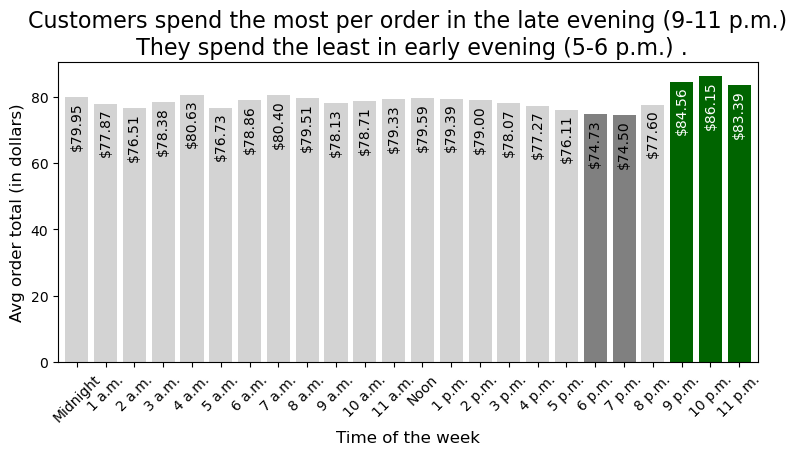

In [109]:
# define x and y to be plotted
x = hod
y = df_3['total_spent_in_order']
z = df_3['total_spent_in_order'].map('${:,.2f}'.format)
col = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'white', 'white', 'white']

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]-15, z[i], 
                 ha='center',
                 rotation = 90,
                 size=10, 
                 color=col[i]
                )

# Make a bar chart for size_of_orders
order_hod = df_3['total_spent_in_order'].plot(kind='bar',
                                           color = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'grey', 'grey', 'lightgrey','darkgreen', 'darkgreen', 'darkgreen'],
                                           figsize=(10,5),
                                           width = 0.8)

# call the function to add value labels
addlabels(x,y)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity

plt.ylabel('Avg order total (in dollars)', size=12)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of the week", size=12 )

plt.title ("Customers spend the most per order in the late evening (9-11 p.m.)\n They spend the least in early evening (5-6 p.m.) .", size=16)

plt.show()

In [110]:
# Exporting bar chart
order_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hod.png'))